           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


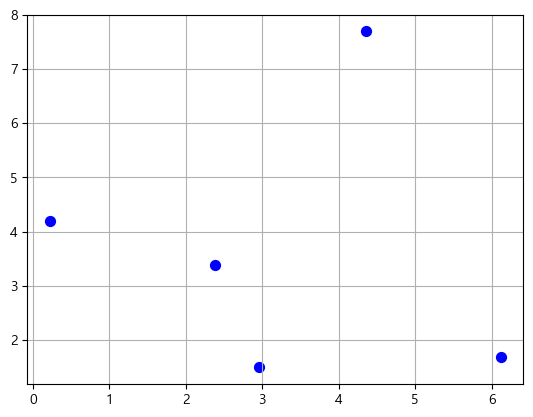

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
var = ['X', 'Y']
labels = ['점0', '점1', '점2', '점3', '점4']

X = np.random.random_sample([5, 2]) * 10
df = pd.DataFrame(X, columns=var, index=labels)
print(df)

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[:, 0], X[:, 1], c = 'blue', marker='o', s=50)
plt.grid(True)
plt.show()

In [3]:
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric = 'euclidean')
distmatrix

array([6.25496953, 3.1746961 , 6.40948658, 4.09773961, 6.35869002,
       5.41180656, 4.74596264, 3.84603471, 1.96820089, 2.31433823])

In [4]:
row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
row_dist

,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


In [5]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(distmatrix, method = 'complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [7]:
pd.DataFrame(row_clusters, columns = ['클러스터id1', '클러스터id2', '거리', '클러스터멤버수'],
            index = ['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])

,클러스터id1,클러스터id2,거리,클러스터멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


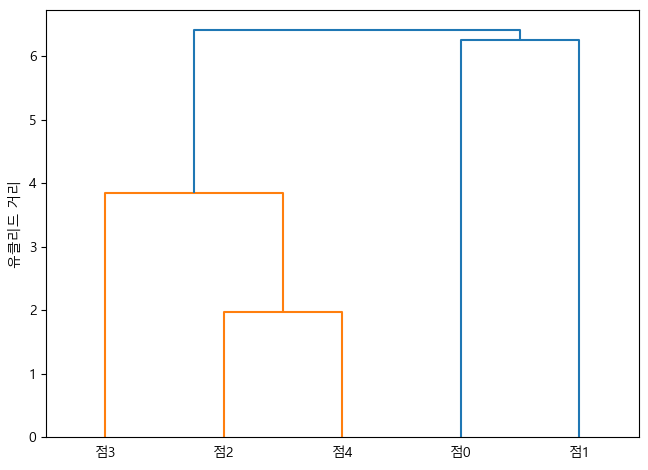

In [8]:
from scipy.cluster.hierarchy import dendrogram

row_dendrogram = dendrogram(row_clusters, labels=labels, leaf_font_size=10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

In [9]:
from scipy.cluster.hierarchy import fcluster

In [16]:
predict = fcluster(row_clusters, 1, criterion = 'distance')
predict

array([4, 5, 1, 3, 2], dtype=int32)

In [23]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)
print("클러스터 분류 결과 : ", labels)

클러스터 분류 결과 :  [0 0 1 1 1]


In [24]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset("iris", package = "datasets")
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [26]:
type(iris_df)

pandas.core.frame.DataFrame

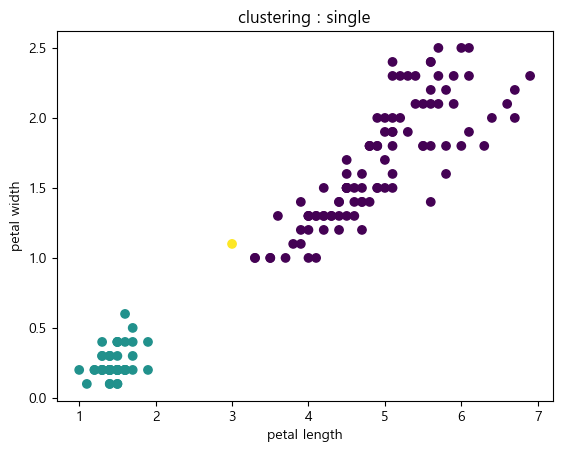

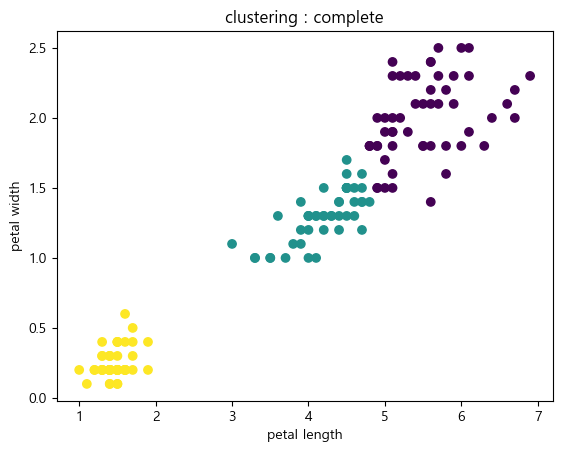

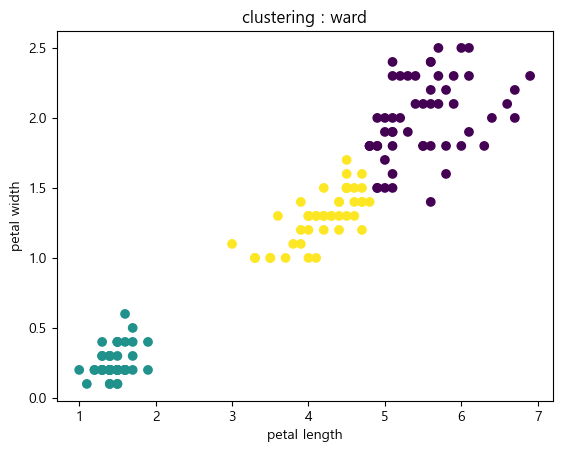

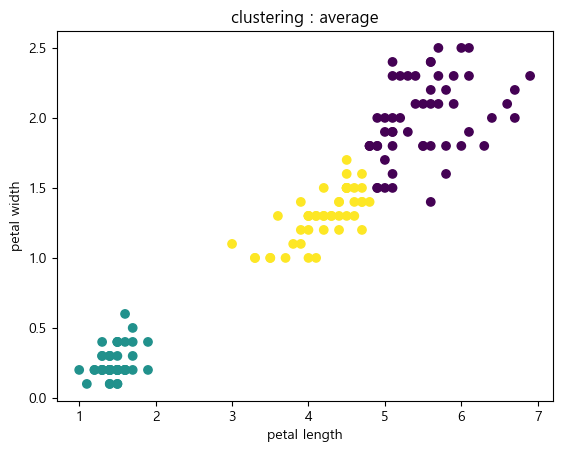

In [28]:
from sklearn.cluster import AgglomerativeClustering

linkage = ['single', 'complete', 'ward', 'average']

for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = i)
    hier.fit(iris_df.iloc[:, 2:4])
    plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c = hier.labels_)
    plt.title("clustering : " + i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

In [37]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
adj_pred = np.choose((pred), [2, 1, 0]).astype(np.int64)
adj_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

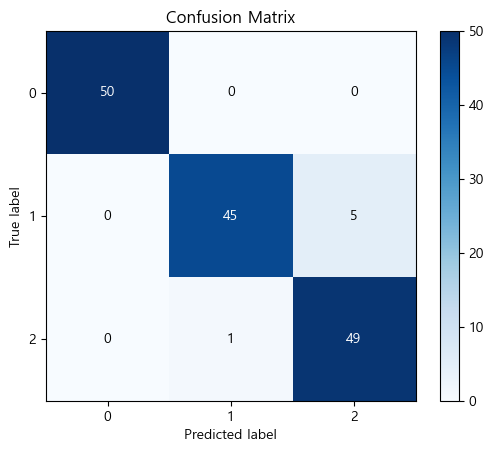

In [40]:
ac = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
pred = ac.fit_predict(iris_df.iloc[:, 2:4])

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(iris_df.Species, adj_pred)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(iris_df.Species, adj_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [42]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(labels_true = iris_df.Species, labels_pred = adjusted_pred)

0.8857921001989628